In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from scipy.stats import uniform, randint
import json 
from tools import create_x_y

In [2]:
df = pd.read_csv('../datasets/v2.1/more_cols_binned/no_weight/amzn.csv')

In [3]:
def measure(x, y):
    clf = RandomForestClassifier()

    params = {
        "n_estimators": [200, 500],
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": [4, 8],
        "criterion": ["gini", "entropy"],
    }
    time_split = TimeSeriesSplit(n_splits=5)

    clf_search = GridSearchCV(
        clf,
        param_grid=params,
        cv=time_split,
        verbose=1,
        n_jobs=-1,
    )

    split = int(0.8 * len(x))
    clf_search.fit(x[:split], y[:split])
    y_pred = clf_search.predict(x[split:])
    f1 = f1_score(y[split:], y_pred)
    acc = accuracy_score(y[split:], y_pred)

    return round(f1, 3), round(acc, 3)


In [4]:
# ===== BASELINE =====

full_names = {
    "amzn": "Amazon",
    "aapl": "Apple",
    "msft": "Microsoft",
    "tsla": "Tesla",
    "goog": "Google (GOOG)",
    "googl": "Google (GOOGL)",
}
weight = "no_weight"
acc = {}
cm = {}
f1_metric = {}


for company in full_names.keys():
    df = pd.read_csv(f"../datasets/v2.1/more_cols_binned/{weight}/{company}.csv")
    #VITAL_COLS = ["post_date", "ticker", "open", "high", "close"]
    #OTHER_COLS = [i for i in df.columns if i not in VITAL_COLS]
    OTHER_COLS = ["open", "high", "close", "vol"]
    print(OTHER_COLS)
    acc[company] = {}
    f1_metric[company] = {}


    for lag in [1, 2, 3, 6, 8]:
        x, y = create_x_y(df, x_cols=["open", "close", "vol", "high"], y_col="bin_2", lag=lag)
        print(f"Starting {company}, {lag}.")
        acc[company][lag], f1_metric[company][lag] = measure(
            x, y
        )
        
with open(f"../results/v3/RF_acc_f1_v3_base.txt", "w") as file:
    to_write = "Acc: " + json.dumps(acc) + " F1: " + json.dumps(f1_metric)
    file.write(json.dumps(to_write))

['open', 'high', 'close', 'vol']
Starting amzn, 3.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 6.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 10.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 16.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
['open', 'high', 'close', 'vol']
Starting aapl, 3.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting aapl, 6.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting aapl, 10.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting aapl, 16.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
['open', 'high', 'close', 'vol']
Starting msft, 3.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting msft, 6.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting msft, 10.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting msft, 1

In [25]:
# ===== NO_W =====

full_names = {
    "amzn": "Amazon",
    "aapl": "Apple",
    "msft": "Microsoft",
    "tsla": "Tesla",
    "goog": "Google (GOOG)",
    "googl": "Google (GOOGL)",
}
weight = "no_weight"
acc = {}
cm = {}
f1_metric = {}


for company in full_names.keys():
    df = pd.read_csv(f"../datasets/v2.1/more_cols_binned/{weight}/{company}.csv")
    VITAL_COLS = ["post_date", "ticker"]
    OTHER_COLS = [i for i in df.columns if i not in VITAL_COLS]
    print(OTHER_COLS)
    acc[company] = {}
    f1_metric[company] = {}


    for lag in [1, 2, 3, 6, 8]:
        x, y = create_x_y(df, x_cols=["open", "close", "vol", "high"], y_col="bin_2", lag=lag)
        print(f"Starting {company}, {lag}.")
        acc[company][lag], f1_metric[company][lag] = measure(
            x, y
        )
        
with open(f"../results/v3/RF_acc_f1_v3_no_W.txt", "w") as file:
    to_write = "Acc: " + json.dumps(acc) + " F1: " + json.dumps(f1_metric)
    file.write(json.dumps(to_write))

['open', 'high', 'low', 'close', 'vol', 'comment_num_sum', 'comp_max', 'comp_mean', 'comp_median', 'comp_min', 'comp_std', 'like_num_sum', 'neg_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_std', 'neu_max', 'neu_mean', 'neu_median', 'neu_min', 'neu_std', 'count', 'pos_max', 'pos_mean', 'pos_median', 'pos_min', 'pos_std', 'retweet_num_sum', 'relative_count', 'diffs', 'bin_2', 'bin_3']
Starting amzn, 3.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 6.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 10.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 16.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
['open', 'high', 'low', 'close', 'vol', 'comment_num_sum', 'comp_max', 'comp_mean', 'comp_median', 'comp_min', 'comp_std', 'like_num_sum', 'neg_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_std', 'neu_max', 'neu_mean', 'neu_median', 'neu_min', 'neu_std', 'count', 'pos_max', 'pos_mean', 

<AxesSubplot:ylabel='close'>

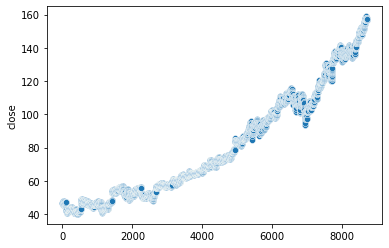

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

tsla = pd.read_csv("../datasets/v2.1/more_cols_binned/no_weight/msft.csv")
sns.scatterplot(x = range(len(tsla.close)), y = "close", data=tsla)

In [5]:
# ===== W_1 =====

full_names = {
    "amzn": "Amazon",
    "aapl": "Apple",
    "msft": "Microsoft",
    "tsla": "Tesla",
    "goog": "Google (GOOG)",
    "googl": "Google (GOOGL)",
}
weight = "w1"
acc = {}
cm = {}
f1_metric = {}


for company in full_names.keys():
    df = pd.read_csv(f"../datasets/v2.1/more_cols_binned/{weight}/{company}.csv")
    VITAL_COLS = ["post_date", "ticker"]
    OTHER_COLS = [i for i in df.columns if i not in VITAL_COLS]
    print(OTHER_COLS)
    acc[company] = {}
    f1_metric[company] = {}


    for lag in [3, 6, 10, 16]:
        x, y = create_x_y(df, x_cols=["open", "close", "vol", "high"], y_col="bin_2", lag=lag)
        print(f"Starting {company}, {lag}.")
        acc[company][lag], f1_metric[company][lag] = measure(
            x, y
        )
        
with open(f"RF_v3__acc_f1_{weight}.txt", "w") as file:
    to_write = "Acc: " + json.dumps(acc) + " F1: " + json.dumps(f1_metric)
    file.write(json.dumps(to_write))



['open', 'high', 'low', 'close', 'vol', 'comment_num_sum', 'comp_max', 'comp_mean', 'comp_median', 'comp_min', 'comp_std', 'like_num_sum', 'neg_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_std', 'neu_max', 'neu_mean', 'neu_median', 'neu_min', 'neu_std', 'count', 'pos_max', 'pos_mean', 'pos_median', 'pos_min', 'pos_std', 'retweet_num_sum', 'relative_count', 'diffs', 'bin_2', 'bin_3']
Starting amzn, 3.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 6.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 10.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Starting amzn, 16.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
['open', 'high', 'low', 'close', 'vol', 'comment_num_sum', 'comp_max', 'comp_mean', 'comp_median', 'comp_min', 'comp_std', 'like_num_sum', 'neg_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_std', 'neu_max', 'neu_mean', 'neu_median', 'neu_min', 'neu_std', 'count', 'pos_max', 'pos_mean', 